In [1]:
import emat
emat.require_version('0.5.2')
import pandas as pd
from emat.viz import scatter_graphs
from emat.model import PythonCoreModel
from emat.analysis import display_experiments, contrast_experiments
from emat.analysis.prim import Prim
from emat.analysis import CART

emat 0.5.2, plotly 5.18.0


In [2]:
scope = emat.Scope('ve_scope_uniform.yaml')
db = emat.SQLiteDB()
scope.store_scope(db)

In [3]:
def tempFun():
    return None

In [4]:
g = PythonCoreModel(
    function=tempFun,
    configuration=None,
    scope=scope,
    db=db,
)
g

<emat.PythonCoreModel "EMAT" with 8 uncertainties, 6 measures>

In [5]:
lhs = pd.read_csv('VE_results_input_design_uniform.csv')
lhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Congestion charges  90 non-null     float64
 1   Employment growth   90 non-null     float64
 2   Fuel costs          90 non-null     float64
 3   Population          90 non-null     int64  
 4   Road capacity       90 non-null     float64
 5   Telework            90 non-null     float64
 6   Transit service     90 non-null     float64
 7   VMT tax             90 non-null     float64
 8   Dvmt                90 non-null     float64
 9   CO2e                90 non-null     float64
 10  VehicleTrips        90 non-null     float64
 11  WalkTrips           90 non-null     float64
 12  BikeTrips           90 non-null     float64
 13  TransitTrips        90 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 10.0 KB


In [6]:
db.write_experiment_all(
    'VisionEval',
    'lhs',
    emat.SOURCE_IS_CORE_MODEL,
    lhs,
)

In [7]:
len(g.read_experiments('lhs'))

90

In [8]:
g.scope.get_measure_names()

['Dvmt', 'CO2e', 'VehicleTrips', 'WalkTrips', 'BikeTrips', 'TransitTrips']

In [9]:
mm = g.create_metamodel_from_design(
    'lhs',
    include_measures=g.scope.get_measure_names(),
    suppress_converge_warnings=True,
)
mm

<emat.PythonCoreModel "MetaModel1", metamodel_id=1 with 8 uncertainties, 6 measures>

In [10]:
mm.function

<emat.MetaModel 8 inputs -> 6 outputs>

In [11]:
mm.function.regression.lr.r2

Dvmt            0.946451
CO2e            0.947413
VehicleTrips    0.947737
WalkTrips       0.997727
BikeTrips       0.996930
TransitTrips    0.993565
dtype: float64

In [12]:
#mm.function.regression.lr.coefficients_summary()

In [13]:
# mm.function.cross_val_scores()

In [12]:
design = mm.design_experiments(n_samples=10000, sampler='lhs')
result = mm.run_experiments(design, db=False)

<xmle.Elem 'img' with 0 children>
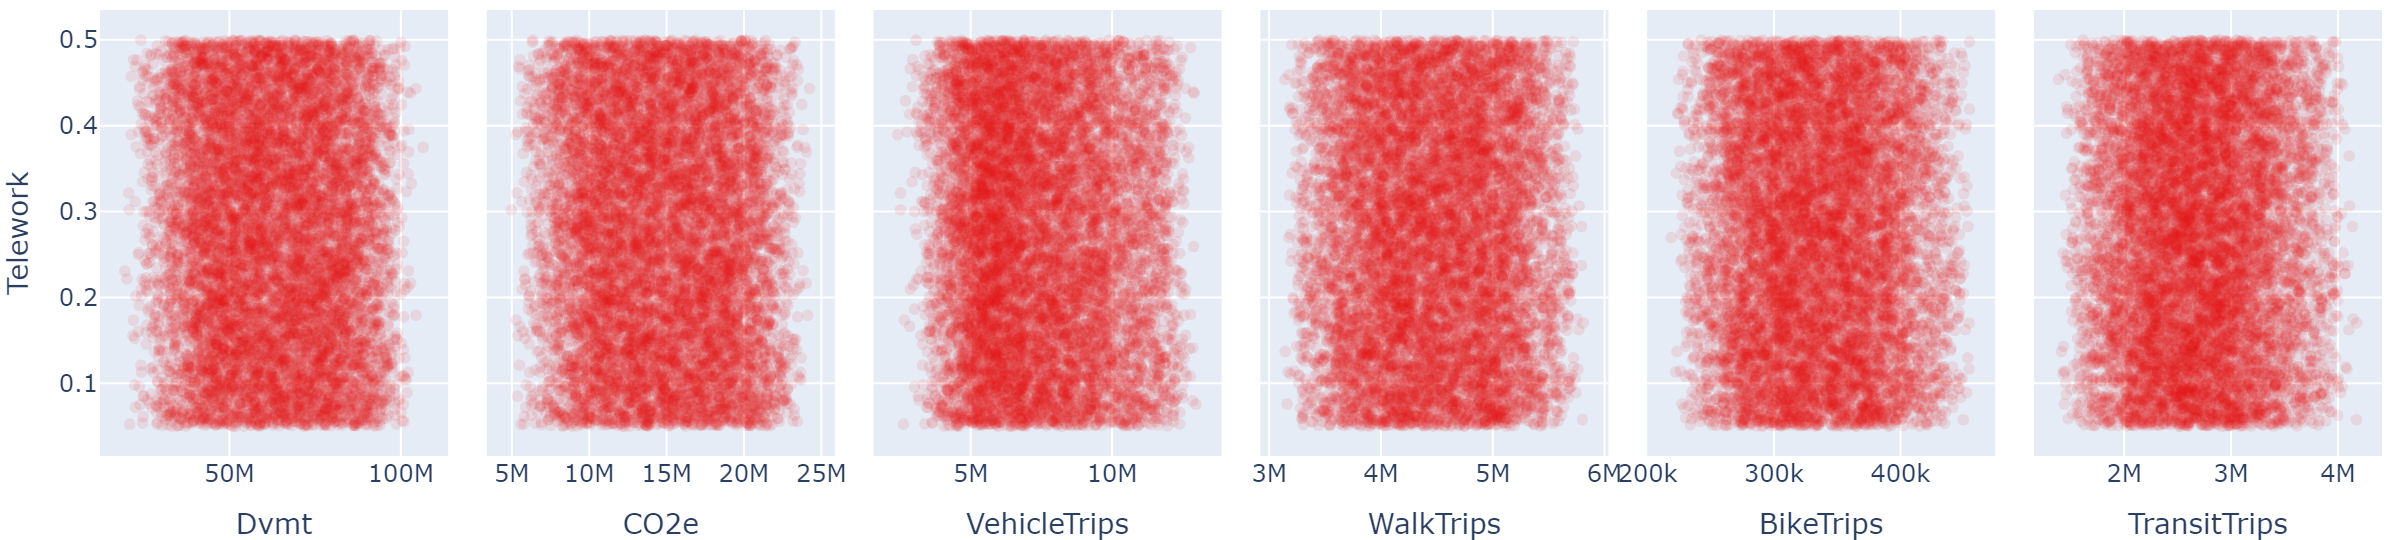

In [13]:
scatter_graphs('Telework', result, scope=mm.scope, render='png')

<xmle.Elem 'img' with 0 children>
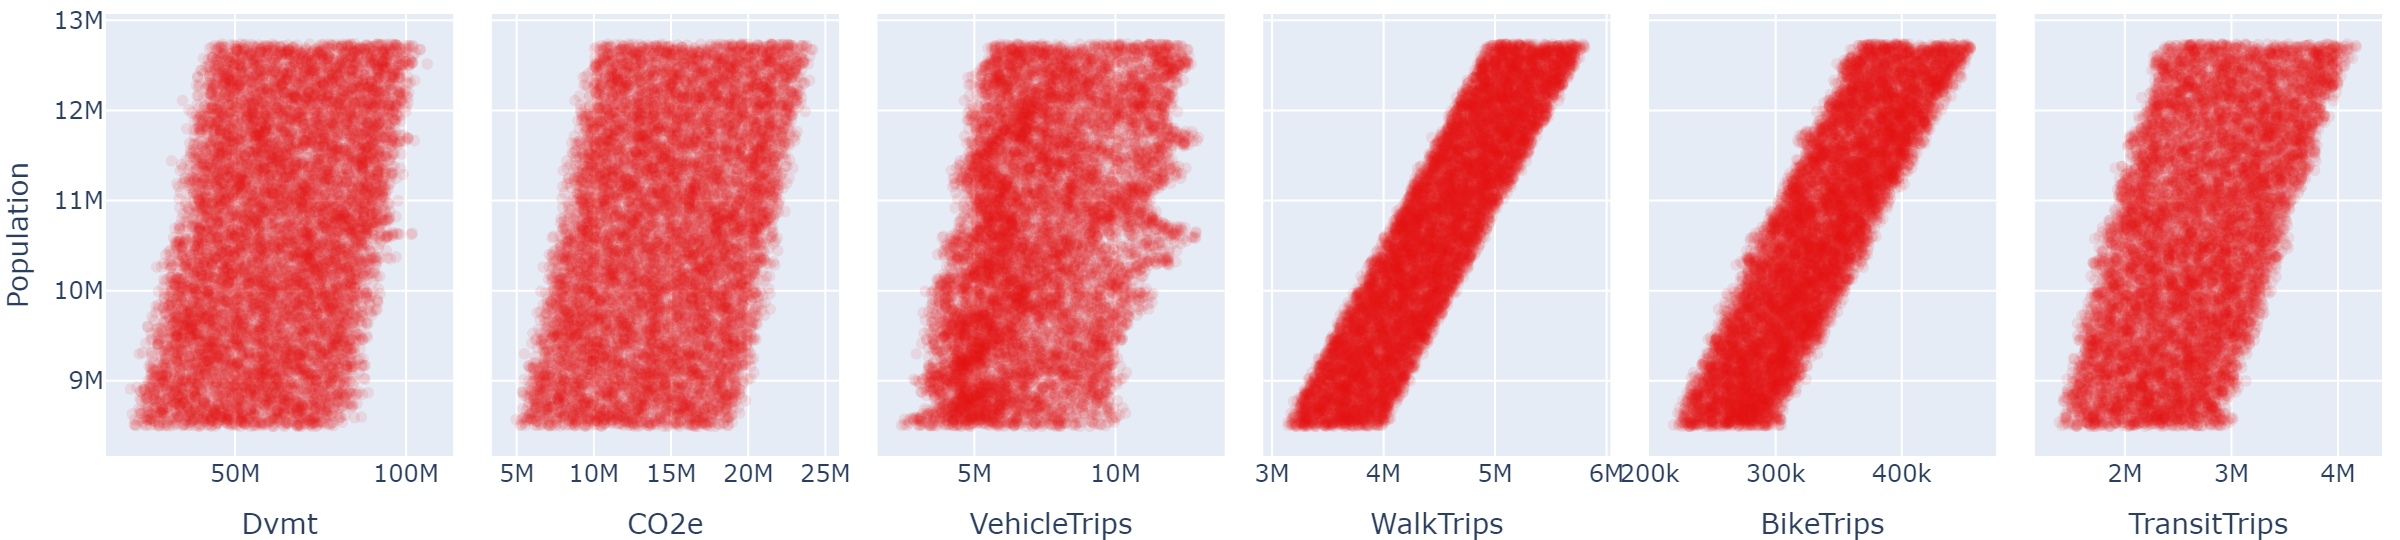

In [14]:
scatter_graphs('Population', result, scope=mm.scope, render='png')

In [17]:
mm.get_feature_scores('lhs')

Dvmt

<xmle.Elem 'img' with 0 children>
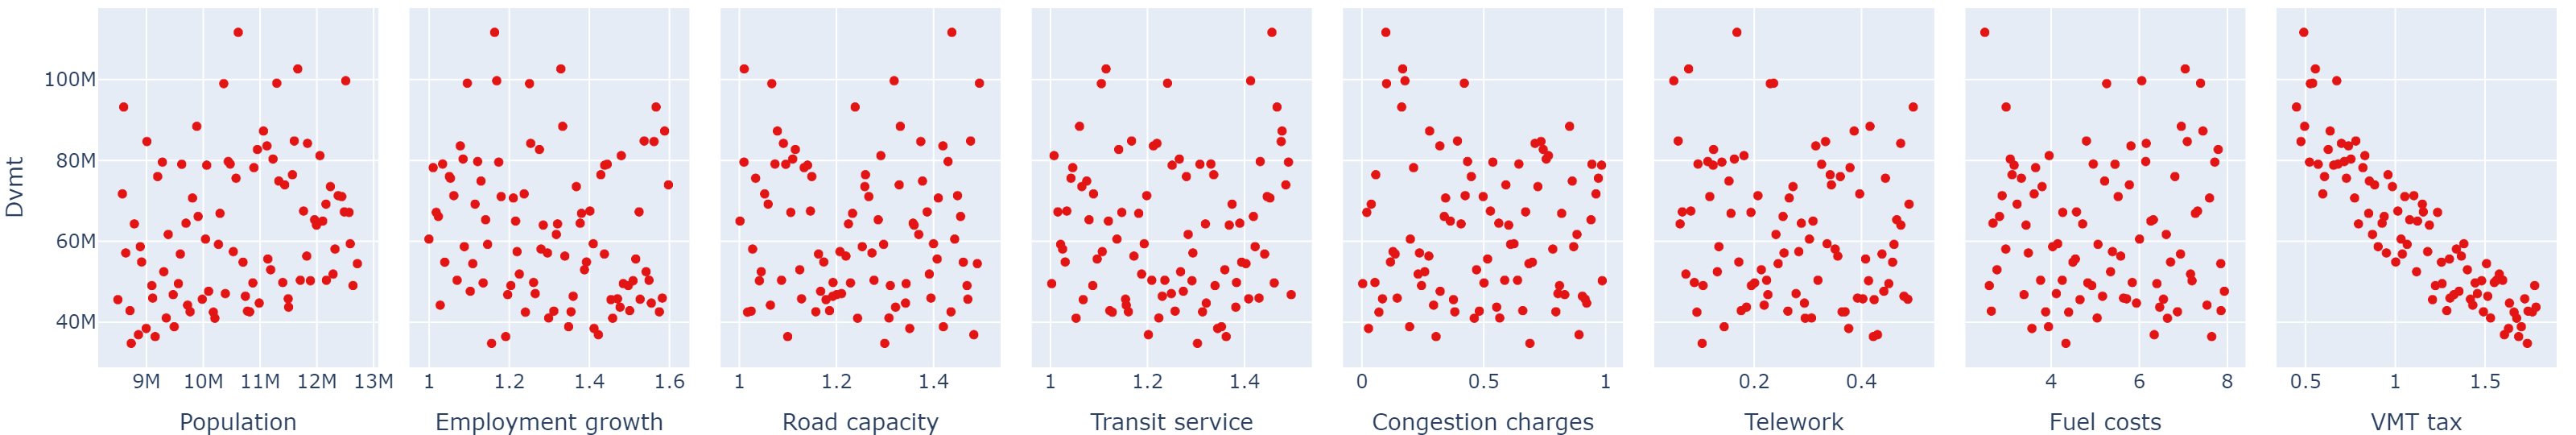

CO2e

<xmle.Elem 'img' with 0 children>
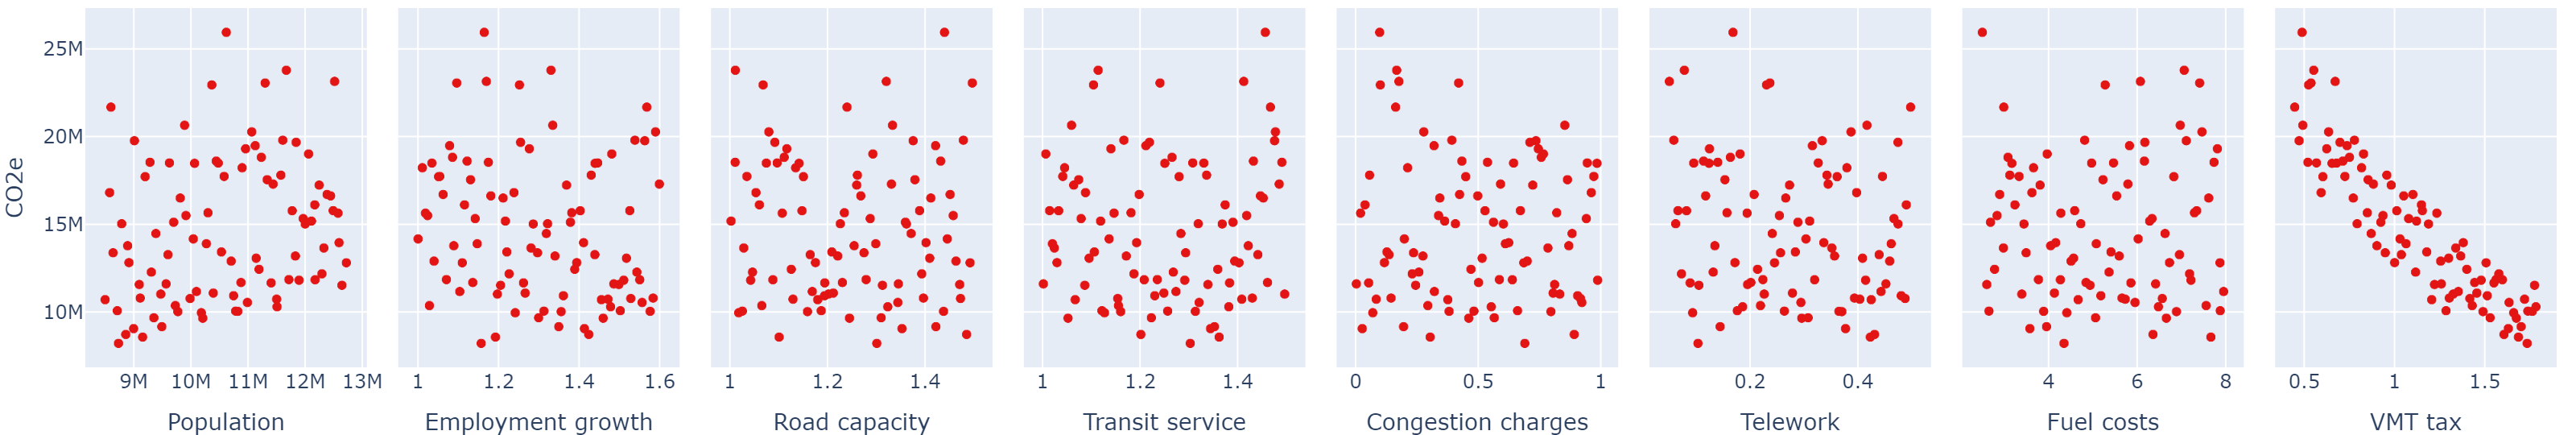

VehicleTrips

<xmle.Elem 'img' with 0 children>
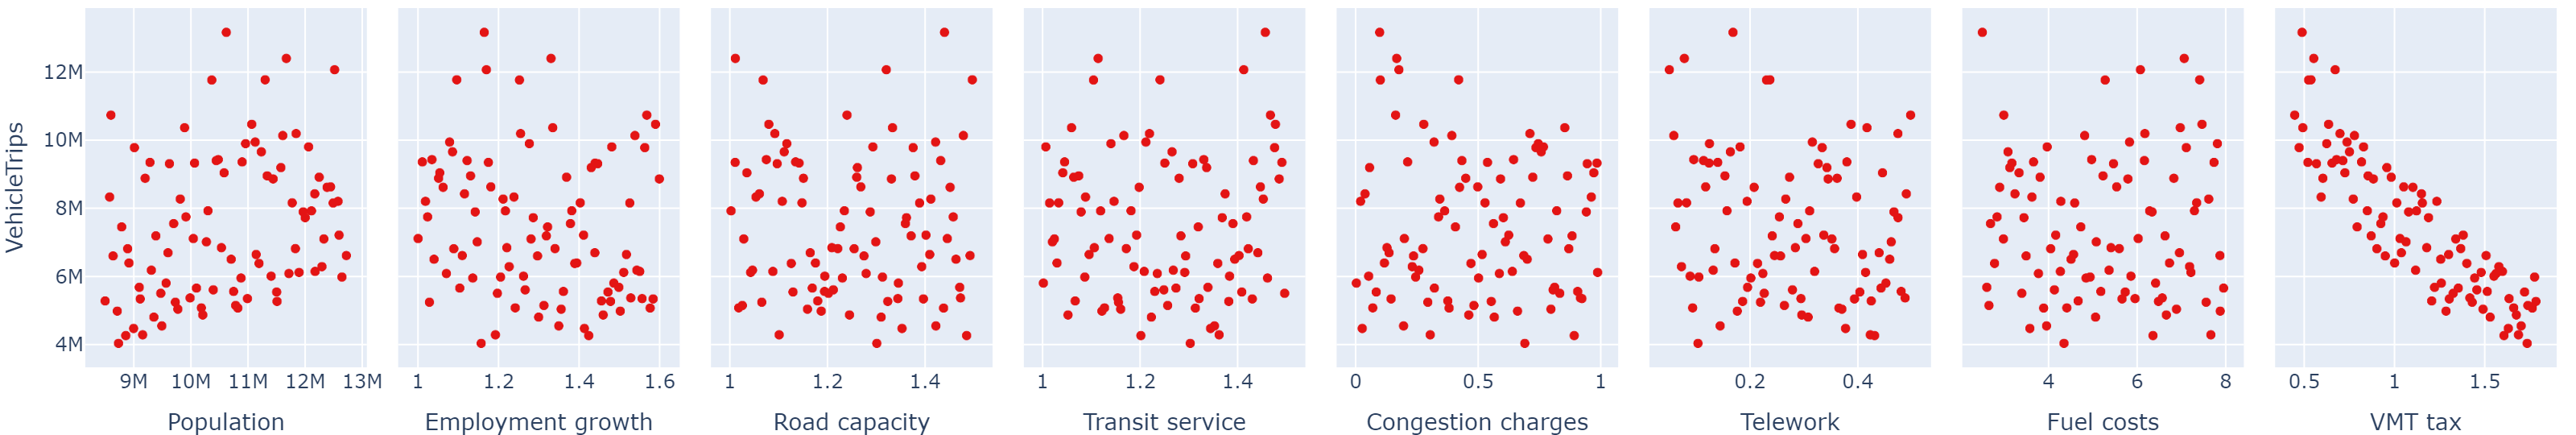

WalkTrips

<xmle.Elem 'img' with 0 children>
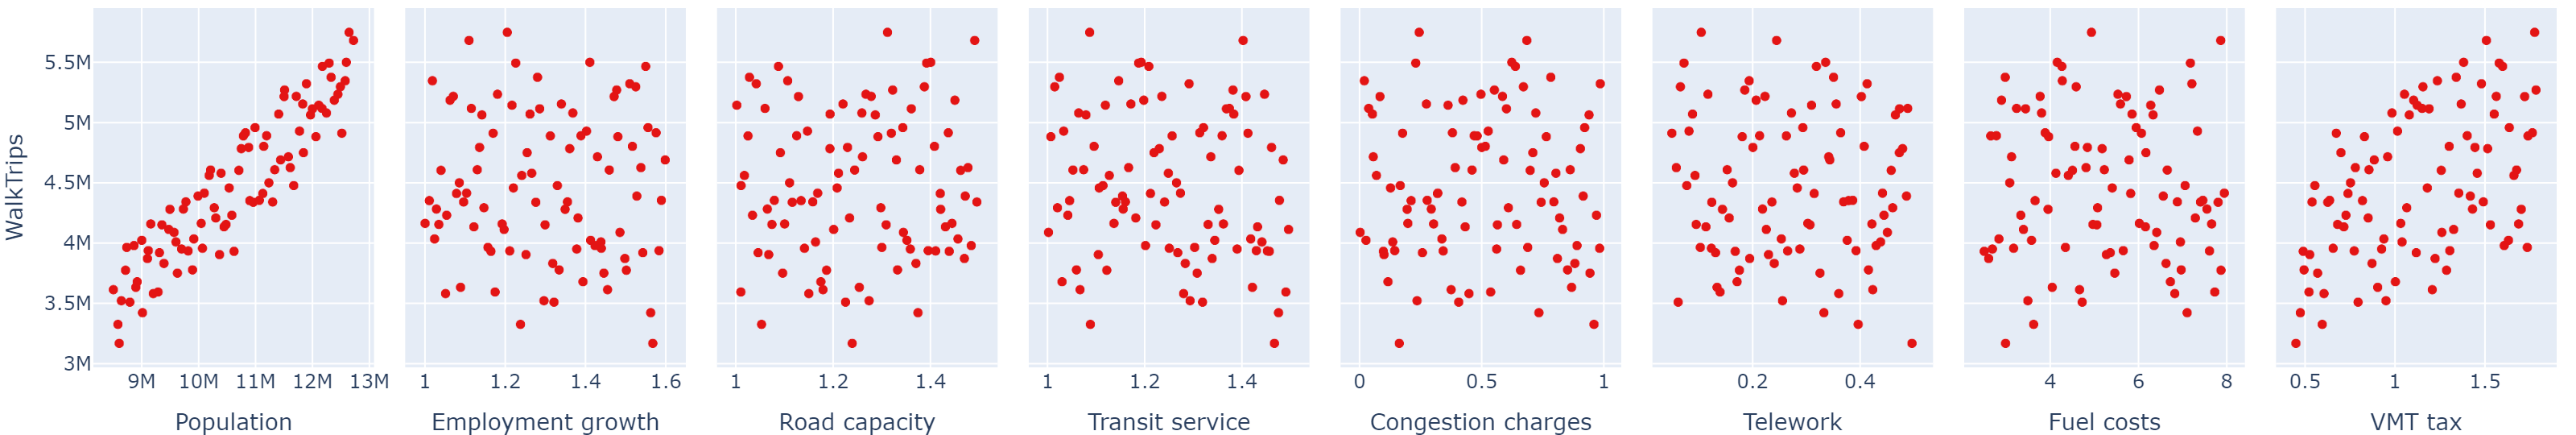

BikeTrips

<xmle.Elem 'img' with 0 children>
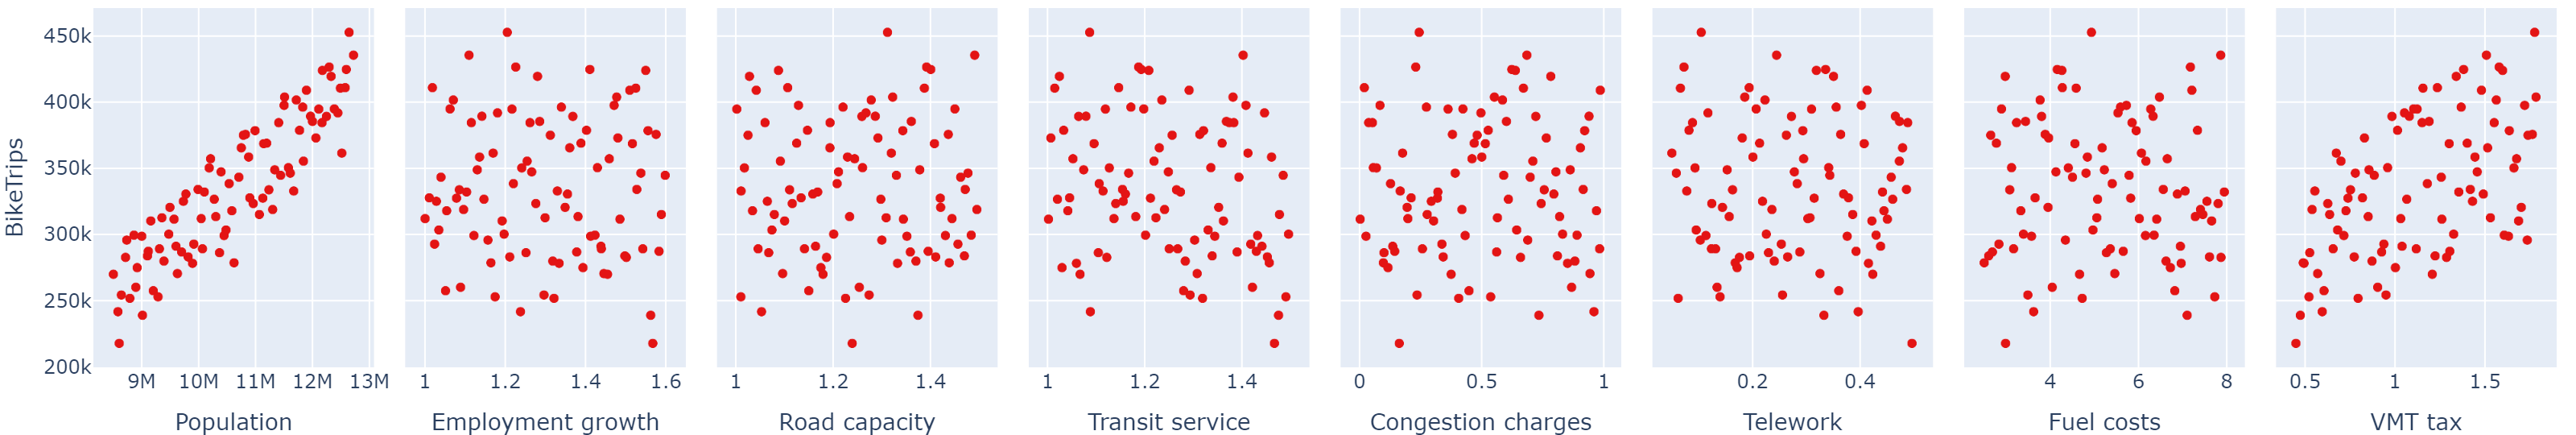

TransitTrips

<xmle.Elem 'img' with 0 children>
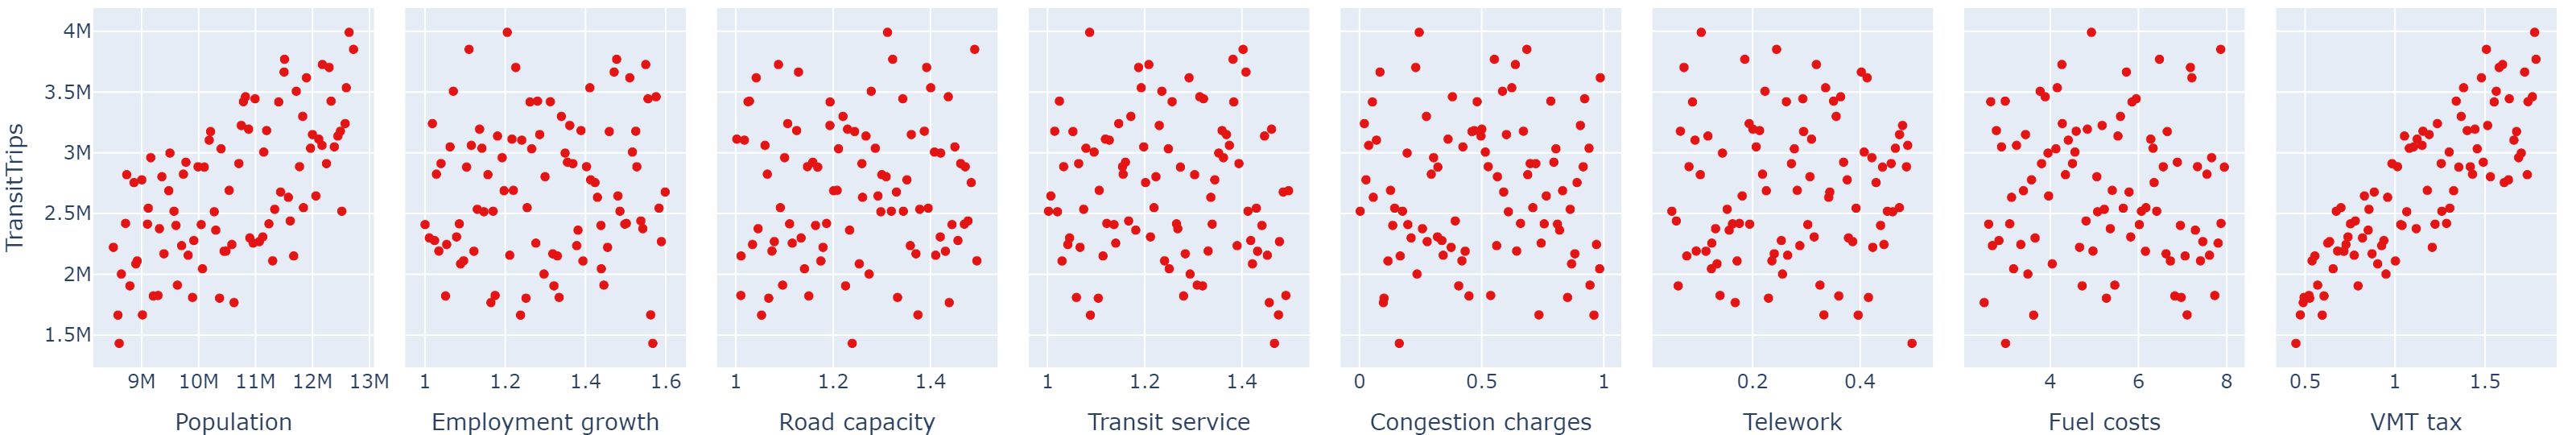

In [15]:
display_experiments(scope, lhs)

In [16]:
design2 = mm.design_experiments(scope=scope,
                                     db=db,
                                     n_samples_per_factor=10,
                                     sampler='lhs',
                                     random_seed=42)

result2 = mm.run_experiments(design2)

Dvmt

<xmle.Elem 'img' with 0 children>
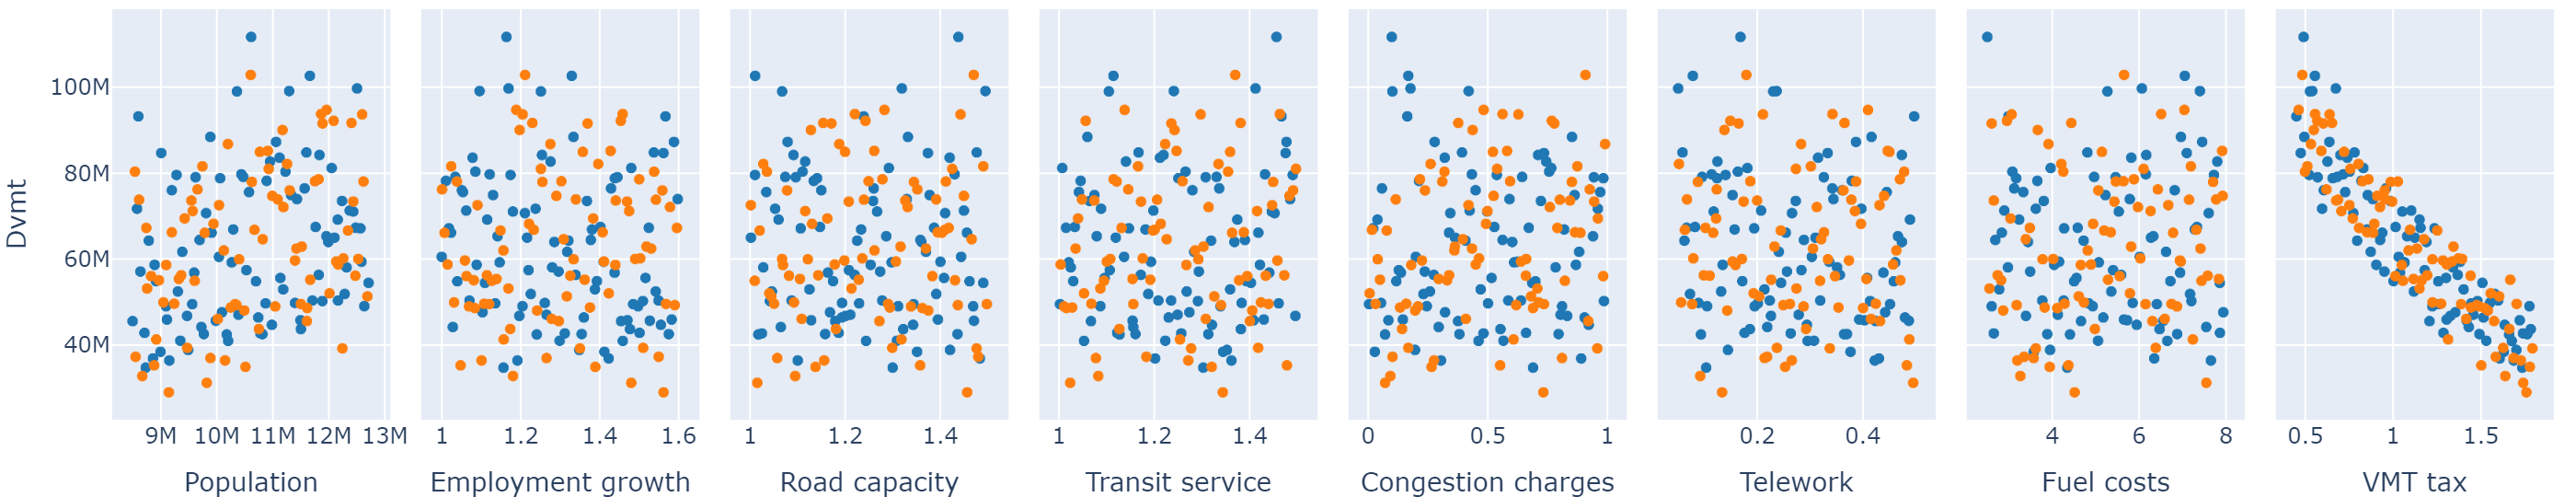

CO2e

<xmle.Elem 'img' with 0 children>
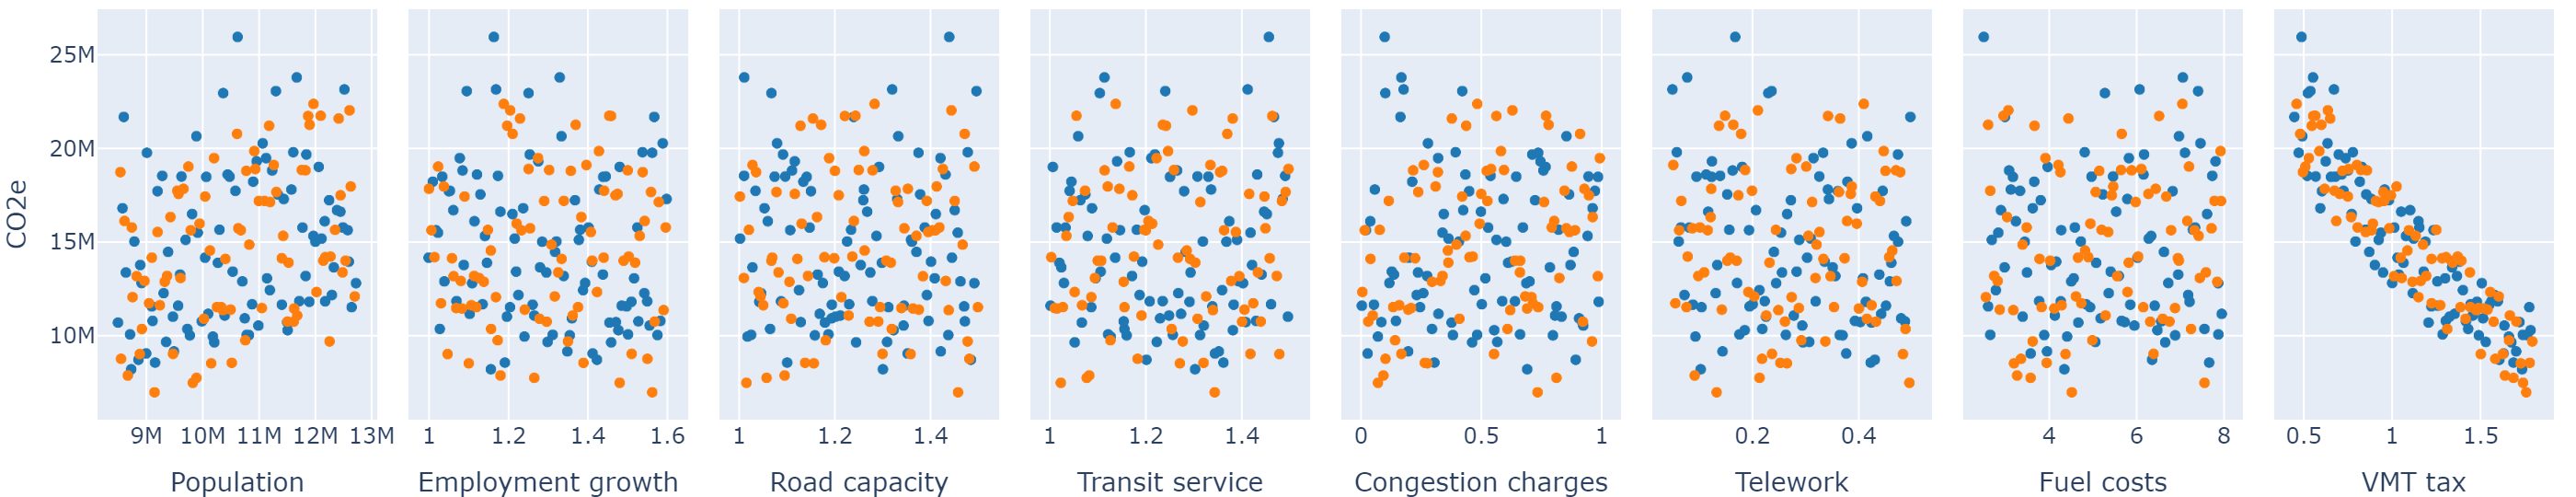

VehicleTrips

<xmle.Elem 'img' with 0 children>
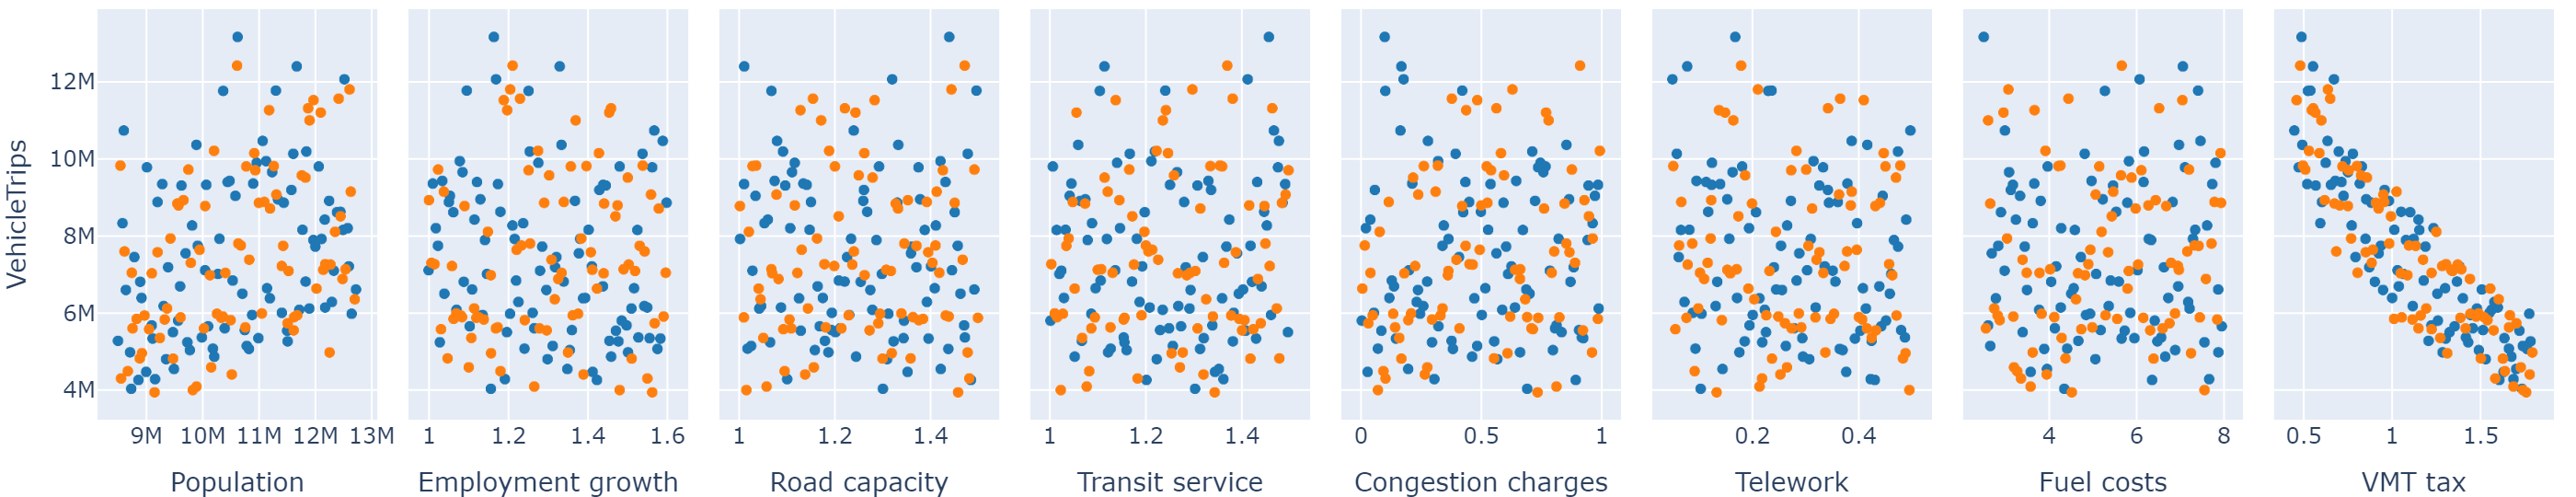

WalkTrips

<xmle.Elem 'img' with 0 children>
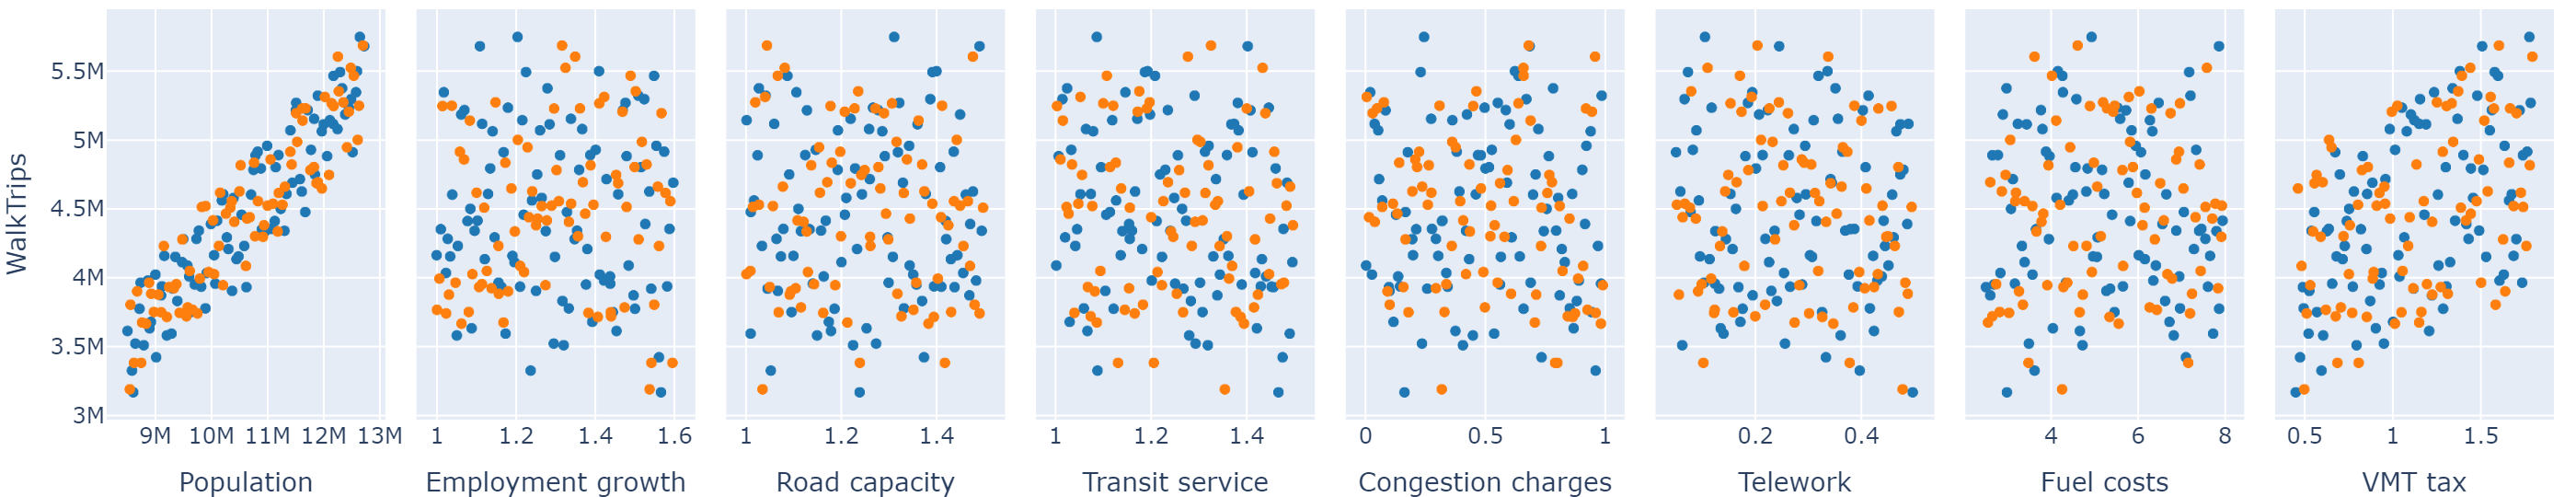

BikeTrips

<xmle.Elem 'img' with 0 children>
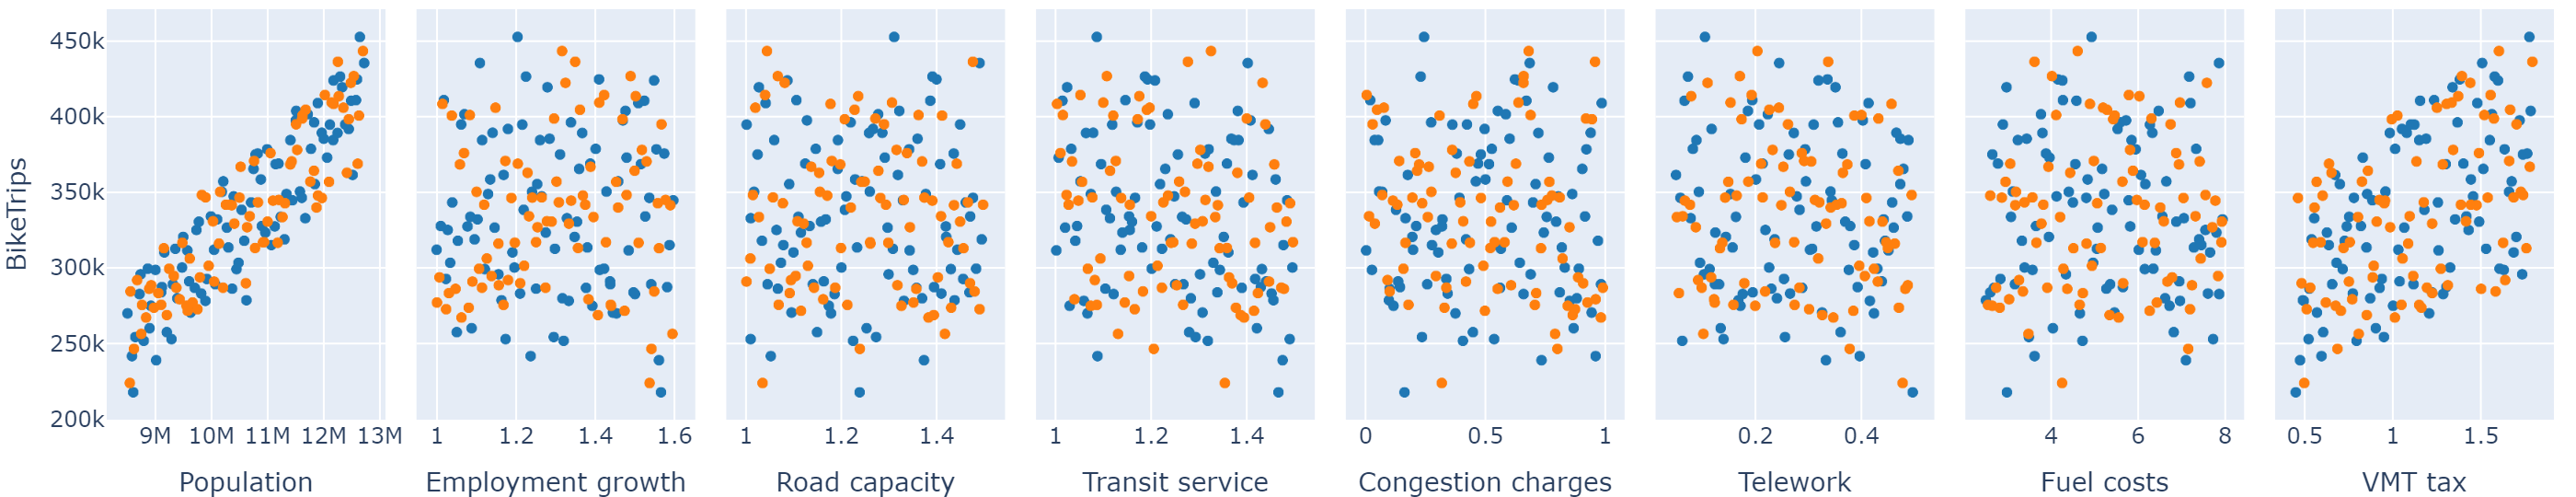

TransitTrips

<xmle.Elem 'img' with 0 children>
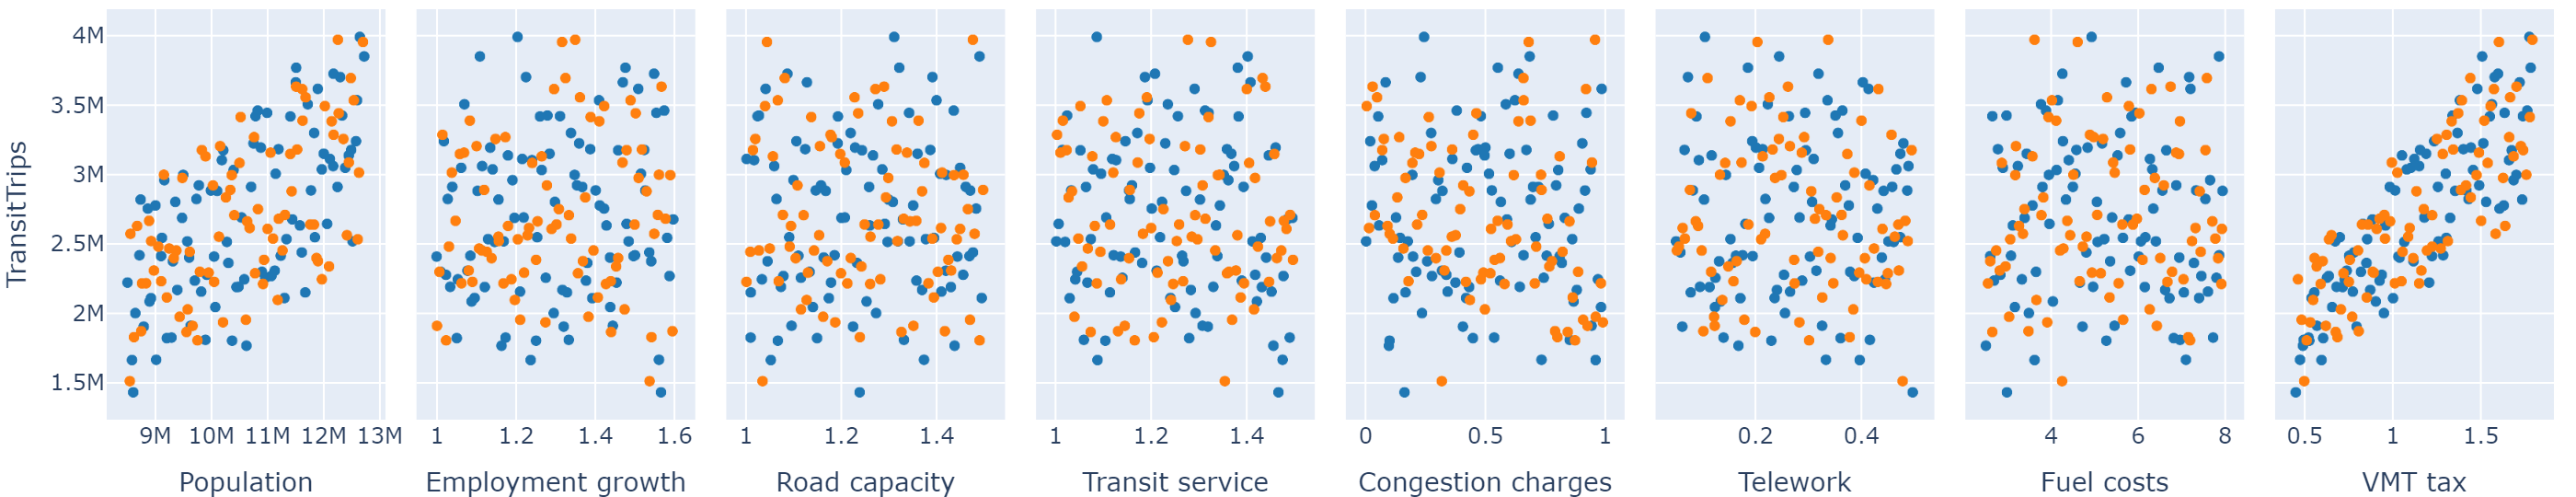

In [17]:
contrast_experiments(scope, lhs, result2)

In [18]:
of_interest = result['BikeTrips']>3.5e+05

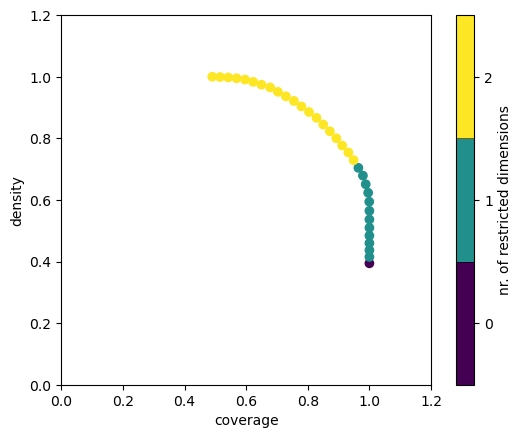

In [19]:
discovery = Prim(
    design,
    of_interest,
    threshold=0.02,
    scope=scope
)

box1 = discovery.find_box()
ax = box1.show_tradeoff()

In [20]:
box1

<PrimBox peel 33 of 33>
   coverage: 0.48985
   density:  1.00000
   mean: 1.00000
   mass: 0.19310
   restricted dims: 2
                      min       max
     Population  11147754  12741521
     VMT tax     1.111577  1.799968

In [21]:
box1.splom()

FigureWidget({
    'data': [{'mode': 'markers',
              'showlegend': False,
              'type': 'scatter',
              'uid': '2c47f3ff-26c6-4c4f-a4c9-9c7ced7f0b2c',
              'x': [],
              'xaxis': 'x',
              'y': [],
              'yaxis': 'y'},
             {'fill': 'tozeroy',
              'line': {'color': 'rgb(31, 119, 180)'},
              'showlegend': False,
              'type': 'scatter',
              'uid': '32feba99-4674-4d59-8bc8-e2df39efe005',
              'x': array([ 8197634.39      ,  8221961.7780402 ,  8246289.1660804 ,
                           8270616.5541206 ,  8294943.9421608 ,  8319271.330201  ,
                           8343598.71824121,  8367926.10628141,  8392253.49432161,
                           8416580.88236181,  8440908.27040201,  8465235.65844221,
                           8489563.04648241,  8513890.43452261,  8538217.82256281,
                           8562545.21060302,  8586872.59864322,  8611199.98668342,
      

In [22]:
cart = CART(
    design,
    of_interest,
    scope=scope,
)

In [ ]:
cart.boxes_to_dataframe(True)

In [ ]:
box = cart.select(6)
box

In [ ]:
box.splom()